# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [15]:
age = [17,51,27,21,36,48,19,26,54,30]
tardies = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({'Age': age, 'Tardies': tardies})
student_data.head()

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

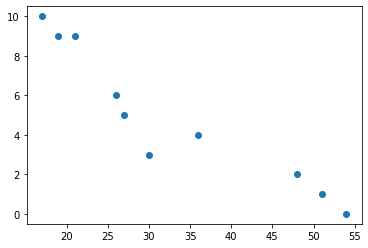

In [16]:
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

It seems that younger people arrive late more times.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
# correlation
correlation = student_data.corr()

# covariance
covariance = student_data.cov()

print(correlation)
print(covariance)

#It seems to be a negative linear correlation between Age and Tardiness


              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [21]:

model = linear_model.LinearRegression()

result = model.fit(student_data[['Age']], student_data['Tardies'])

#Using linear regression, the variable will be student_data['Tardies'].

Plot your regression model on your scatter plot.

In [24]:
display(result.intercept_)
display(result.coef_)

12.888803363135771

array([-0.24282077])

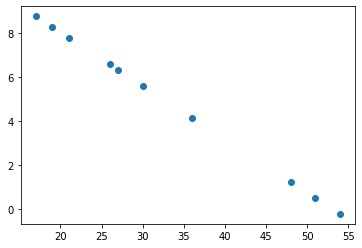

In [28]:
regression_line = result.intercept_ + result.coef_[0] * student_data[['Age']]
plt.scatter(student_data[['Age']].values, regression_line)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [29]:
result.score(x,y)

#Since the value of R2 is so close to 1 we can say that 
#we're pretty confident that there's a link (a negative linear correlation) between age and tardiness.

/Users/eazevedo/opt/anaconda3/envs/project2/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [3]:
vehicles = pd.read_csv('../your-code/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

/var/folders/x3/nrtw1rrd2wx8z7zn70vb11gr0000gn/T/ipykernel_52426/4089078478.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation, dtype=np.bool))


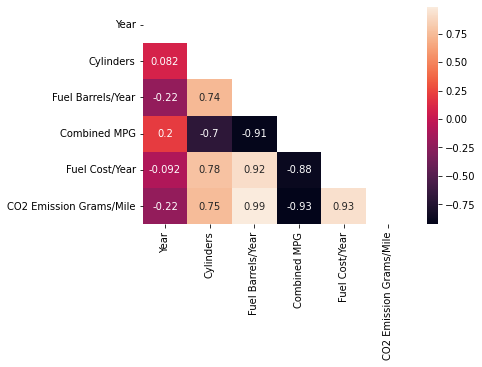

In [5]:
correlation = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
sns.heatmap(correlation, mask=mask, annot= True)
plt.show()

The variables that are more significant in providing information about C02 emissions are the ones related with fuel consumption, particularly the anual consumption of fuel. The information about the year of the car is the one that's least helpful when it comes to the CO2 question.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [18]:
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']


model = linear_model.LinearRegression()
model.fit(X.values, y.values)
model.score(X.values, y.values)

0.9808734920269122

Linear regression, close to 1, which means that the linear regression model has a good fit and the variables are strongly correlated.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [20]:
reg_summary = pd.DataFrame(model.coef_, X.columns, columns=['Summary'])  
reg_summary

,Summary
Year,-0.320617
Cylinders,1.878800
Fuel Barrels/Year,19.052925
Combined MPG,-3.040399
Fuel Cost/Year,0.032309


We can say, with a high level of confidence due to the score of the model, that the most important variable is indeed the Fuel Barrels/year and that year and combined MPG seem to have a negative correlation with C02 emissions.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [32]:
invites = [1,3,4,6,8,9,11,14]
attendance = [1,2,4,4,5,7,8,13]

party_df = pd.DataFrame({'Invites': invites, 'Attendance': attendance})
party_df



,Invites,Attendance
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

/Users/eazevedo/opt/anaconda3/envs/project2/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


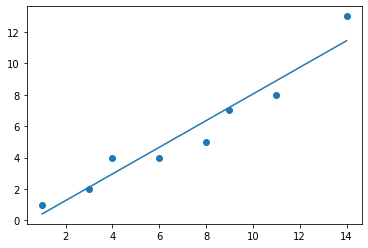

In [27]:
plt.scatter(party_df['Invites'],party_df['Attendance'])
plt.plot(X.values, model.predict(X))
plt.show()

In [23]:
X = party_df[['Invites']]
y = party_df['Attendance']


model = linear_model.LinearRegression()
model.fit(X.values, y.values)
model.score(X.values, y.values)

0.9316696375519905

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [24]:
reg_summary = pd.DataFrame(model.coef_, X.columns, columns=['Summary'])  
reg_summary


,Summary
Invites,0.848485


It tells us that linear regression is an adequate model to fit this situation and that there seems to be a rather high correlation between the number of invitations and the number of people who actually come to the party.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Yes, there's seems to be an outlier when the number of invites is 14 and attendance is 12.


In [29]:
party_df_drop = party_df.drop([7]) 
model2 = linear_model.LinearRegression()
model2.fit(party_df_drop[['Invites']], party_df_drop['Attendance'])
model2.score(party_df_drop[['Invites']], party_df_drop['Attendance'])

0.9433811802232855

/Users/eazevedo/opt/anaconda3/envs/project2/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


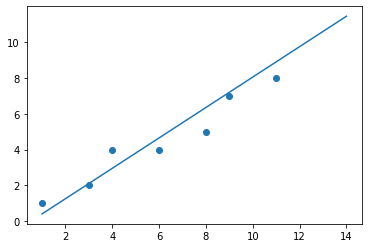

In [30]:
plt.scatter(party_df_drop['Invites'],party_df_drop['Attendance'])
plt.plot(X.values, model.predict(X))
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

The model fitness score changed slightly for the better because we removed what indeed seemed to be an outlier.
